In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating the path to the data I downloaded 
path = "../Downloads/QuickFacts Feb-06-2023.csv"
csv_file = pd.read_csv(path)

In [3]:
#Creating a new dataframe with the newly read data
new_df = pd.DataFrame(csv_file)
new_df.head()

,Fact,Fact Note,"Seattle city, Washington","Value Note for Seattle city, Washington"
0,"Population Estimates, July 1 2022, (V2022)",NaN,NaN,NaN
1,"Population Estimates, July 1 2021, (V2021)",NaN,"733,919",NaN
2,"Population estimates base, April 1, 2020, (V2022)",NaN,NaN,NaN
3,"Population estimates base, April 1, 2020, (V2021)",NaN,"735,157",NaN
4,"Population, percent change - April 1, 2020 (es...",NaN,NaN,NaN


In [4]:
#creating a cleaned dataframe with dropped NaN values
population_df = pd.DataFrame(new_df[["Fact" , "Seattle city, Washington"]])
population_df = population_df.dropna()
population_df

,Fact,"Seattle city, Washington"
1,"Population Estimates, July 1 2021, (V2021)","733,919"
3,"Population estimates base, April 1, 2020, (V2021)","735,157"
5,"Population, percent change - April 1, 2020 (es...",-0.2%
6,"Population, Census, April 1, 2020","737,015"
7,"Population, Census, April 1, 2010","608,660"
...,...,...
62,"Population per square mile, 2020","8,791.8"
63,"Population per square mile, 2010","7,250.9"
64,"Land area in square miles, 2020",83.83
65,"Land area in square miles, 2010",83.94


In [5]:
#converting the values of the Seattle city, Washington column into clean integers so I can run analysis on the values
population_df["Seattle city, Washington"] = population_df["Seattle city, Washington"].replace(',',"", regex=True).replace('%',"", regex=True).replace('X',"0", regex=True).replace('$',"", regex=True).replace('""',"", regex=True)
population_df

,Fact,"Seattle city, Washington"
1,"Population Estimates, July 1 2021, (V2021)",733919
3,"Population estimates base, April 1, 2020, (V2021)",735157
5,"Population, percent change - April 1, 2020 (es...",-0.2
6,"Population, Census, April 1, 2020",737015
7,"Population, Census, April 1, 2010",608660
...,...,...
62,"Population per square mile, 2020",8791.8
63,"Population per square mile, 2010",7250.9
64,"Land area in square miles, 2020",83.83
65,"Land area in square miles, 2010",83.94


In [6]:
population_df["Seattle city, Washington"].dtypes

dtype('O')

In [7]:
#getting the population for 2020 and for 2022 and assigning those values to a variable
pop_2020 = int(float(population_df["Seattle city, Washington"].values[3]))
pop_2022 = int(float(population_df["Seattle city, Washington"].values[1]))

pop_change = str(pop_2021 - pop_2020)
print(pop_change)

-1858


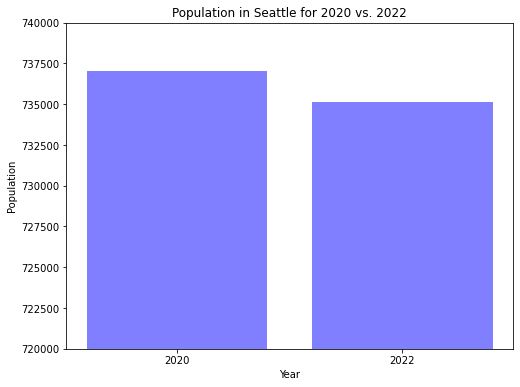

In [8]:
#plotting the population data using the two variables from the cell above in a bar graph
#From the bar graph we can determine that there was a loss in population from 2020 to 2022. We have reason to believe that 
# the option to work remotely is partially to blame for this as people are moving out of the city into cheaper areas since they
# don't have to be in the office anymore.
x_axis = ["2020", "2022"]
tick_locs = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.bar(x_axis, (pop_2020, pop_2022), color='b', alpha=.5)
plt.xticks(tick_locs)
plt.title("Population in Seattle for 2020 vs. 2022")
plt.xlabel("Year")
plt.ylabel("Population")
plt.ylim(720000, 740000)
plt.savefig("../Downloads/Population in 2020 vs 2022")

In [9]:
#getting the percentages of the population that have a high school degree and a college degree and assigning those values to variables
high_school_education = int(float(population_df["Seattle city, Washington"].values[32]))
college_education = int(float(population_df["Seattle city, Washington"].values[33]))


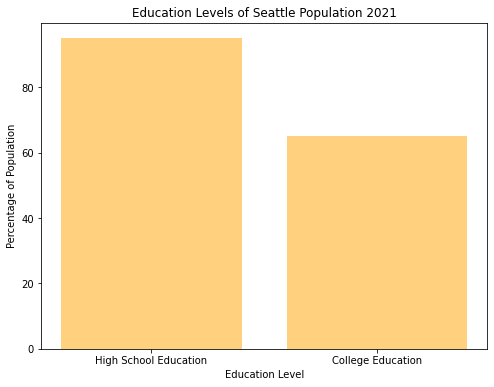

In [10]:
#plotting the education levels using the two variables from the cell above in a bar graph to compare the difference
#We can see that over 95% of the population in Seattle has completed high school and over 65% of the same population has received
# a bachelor's degree in any field. We can conclude that, because of these higher rates of education level, salaries will tend to be larger.
x_axis = ["High School Education", "College Education"]
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,6))
plt.bar(x_axis, (high_school_education, college_education), color='orange', alpha=.5)
plt.title("Education Levels of Seattle Population 2021")
plt.xlabel("Education Level")
plt.ylabel("Percentage of Population")
plt.savefig("../Downloads/Education Levels of Seattle Population")